## Importing Libraries


In [1]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# CV
from sklearn.model_selection import GridSearchCV

# ROC curve
from sklearn.metrics import RocCurveDisplay

# Confusion matrix result
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

## Import Test and Train data

In [2]:
test_data=pd.read_csv('Banking Dataset - Marketing Targets - Test.csv')
train_data=pd.read_csv('Banking Dataset - Marketing Targets - Train.csv')
train_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,29.0,10.0,0.0,3.0,0.0,0.000000,0.0,1.0,1.0,15.0,2.0,317.0,5.0,-1.0,0.0,0.0,0.0
1,57.0,0.0,2.0,1.0,0.0,396.000000,1.0,0.0,1.0,12.0,3.0,108.0,2.0,-1.0,0.0,0.0,0.0
2,54.0,3.0,0.0,3.0,0.0,714.000000,1.0,0.0,1.0,5.0,0.0,225.0,1.0,-1.0,0.0,0.0,0.0
3,52.0,7.0,0.0,1.0,0.0,2072.000000,0.0,0.0,1.0,10.0,2.0,224.0,1.0,-1.0,0.0,0.0,0.0
4,34.0,0.0,0.0,0.0,0.0,1778.000000,1.0,0.0,1.0,4.0,5.0,358.0,1.0,162.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40684,44.0,10.0,1.0,3.0,0.0,1360.860891,1.0,0.0,0.0,18.0,1.0,2093.0,1.0,-1.0,0.0,0.0,1.0
40685,23.0,11.0,1.0,1.0,0.0,508.000000,1.0,0.0,1.0,8.0,11.0,233.0,1.0,92.0,1.0,1.0,0.0
40686,34.0,1.0,2.0,0.0,0.0,1317.000000,0.0,0.0,1.0,15.0,0.0,239.0,1.0,-1.0,0.0,0.0,0.0
40687,33.0,7.0,0.0,1.0,0.0,165.000000,1.0,0.0,0.0,7.0,0.0,111.0,1.0,-1.0,0.0,0.0,0.0


## Finding best model

In [3]:
neigh = KNeighborsClassifier(weights='distance')
X_col=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
Y_col=['y']
parameters={'n_neighbors':np.arange(1,80)}
clf = GridSearchCV(neigh, parameters)
clf.fit(np.array(train_data[X_col]), np.array(train_data[Y_col]).ravel())

GridSearchCV(estimator=KNeighborsClassifier(weights='distance'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])})

In [4]:
clf.best_params_

{'n_neighbors': 74}

## Display confusion matrix and ROC curve for train data

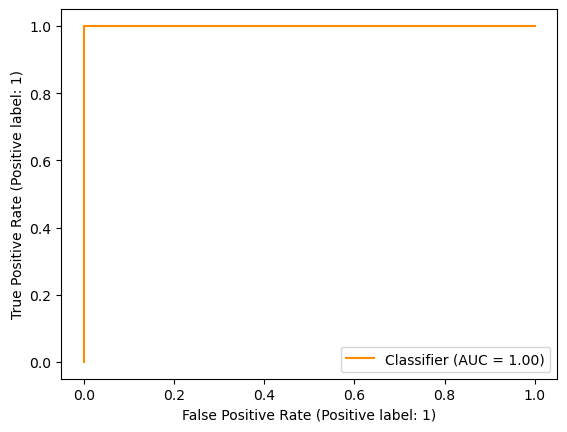

In [5]:
RocCurveDisplay.from_predictions(
    np.array(train_data[Y_col]).ravel(), clf.predict_proba(np.array(train_data[X_col]))[::,1],
    color="darkorange",
)

              precision    recall  f1-score   support

          No       1.00      1.00      1.00     35948
         Yes       1.00      1.00      1.00      4741

    accuracy                           1.00     40689
   macro avg       1.00      1.00      1.00     40689
weighted avg       1.00      1.00      1.00     40689



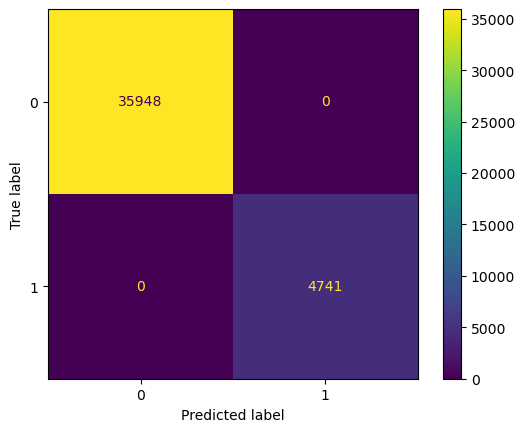

In [6]:
y_true=train_data['y']
y_pred=clf.predict(np.array(train_data[X_col]))
print(classification_report(y_true, y_pred, target_names=['No','Yes']))
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()

## Display confusion matrix and ROC curve for test data

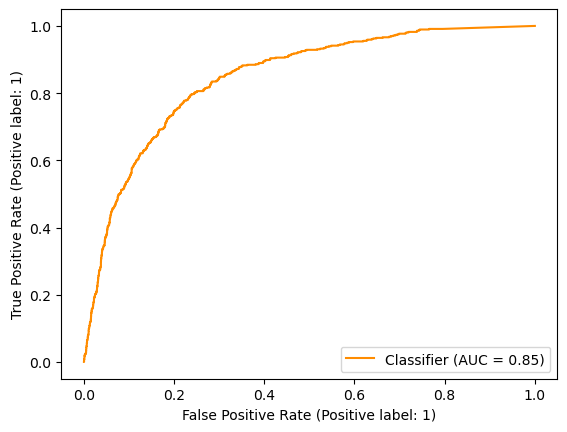

In [7]:
RocCurveDisplay.from_predictions(
    np.array(test_data[Y_col]).ravel(), clf.predict_proba(np.array(test_data[X_col]))[::,1],
    color="darkorange",
)

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      3960
         1.0       0.54      0.16      0.25       562

    accuracy                           0.88      4522
   macro avg       0.72      0.57      0.59      4522
weighted avg       0.85      0.88      0.85      4522



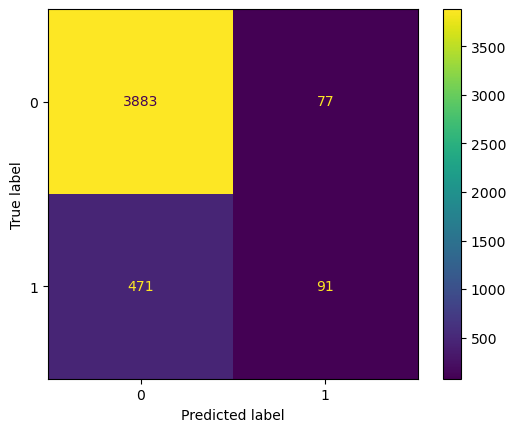

In [8]:
y_pred=clf.predict(np.array(test_data[X_col]))
y_true=test_data['y']
print(classification_report(y_true, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_true, y_pred)).plot()